<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_of_%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –û–±–µ—Ä—ñ—Ç—å –æ–¥–Ω–µ –∑–∞–≤–¥–∞–Ω–Ω—è –Ω–∞ –≤–∏–±—ñ—Ä

# –ó–∞–≤–¥–∞–Ω–Ω—è 1

–ó–∞ –¥–æ–ø–æ–º–æ–≥–æ—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü—ñ—ó –∑–æ–±—Ä–∞–∂–µ–Ω—å –∑–∞–º—ñ–Ω—ñ—Ç—Ç—å —Ñ–æ–Ω –¥–ª—è –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

–Ω–∞ —Ñ–æ–Ω –∑ https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* –æ—Ç—Ä–∏–º–∞–π—Ç–µ –º–∞—Å–∫—É –¥–ª—è –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—é–¥–µ–π, –¥–µ `True` - –ø—ñ–∫—Å–µ–ª—å –∫–ª–∞—Å—É –ª—é–¥–∏–Ω–∏, `False` - –ø—ñ–∫—Å–µ–ª—å —ñ–Ω—à–æ–≥–æ –∫–ª–∞—Å—É
* –∑—Ä–æ–±—ñ—Ç—å –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—ñ—Å—É —Ç–∞–∫–æ–≥–æ –∂ —Ä–æ–∑–º—ñ—Ä—É —è–∫ —ñ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—é–¥–µ–π
* –∑–∞—Å—Ç–æ—Å—É–π—Ç–µ –º–∞—Å–∫—É —â–æ–± –∑–º—ñ–Ω–∏—Ç–∏ –∑–Ω–∞—á–µ–Ω–Ω—è –ø—ñ–∫—Å–µ–ª—ñ–≤ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—ñ—Å—É –Ω–∞ –ø—ñ–∫—Å–µ–ª—ñ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—é–¥–µ–π
* –Ø–∫—â–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–≥–∞–Ω–∏–π –º–æ–∂–µ—Ç–µ —Å–ø—Ä–æ–±—É–≤–∞—Ç–∏ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ –º–∞—Å–∫—É –¥–ª—è –∫–ª–∞—Å—É `__background`

–í–∞—Ä—ñ–∞–Ω—Ç 1

In [74]:
import torch
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision import transforms
from torchvision.io.image import read_image
import numpy as np
from PIL import Image
from torchvision.transforms import functional as F


img = read_image('/content/humans.jpg')
img_forest = read_image('/content/forest.jpg')
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)
model.eval()
transformer = weights.transforms(resize_size=520)
batch2 = transformer(img)
batch = batch2.unsqueeze(0)

batch2.size()

with torch.no_grad():
  pred = model(batch)['out']

# pred

In [75]:
batch2.size()

torch.Size([3, 520, 924])

In [69]:
batch.size()

torch.Size([1, 3, 520, 924])

In [66]:
img.size()

torch.Size([3, 540, 960])

In [46]:
pred.size()

torch.Size([1, 21, 520, 924])

In [11]:
mask = pred.argmax(dim=1)

mask = mask[0]

In [49]:
mask.size()

torch.Size([520, 924])

In [14]:
mask.unique()

tensor([ 0, 15])

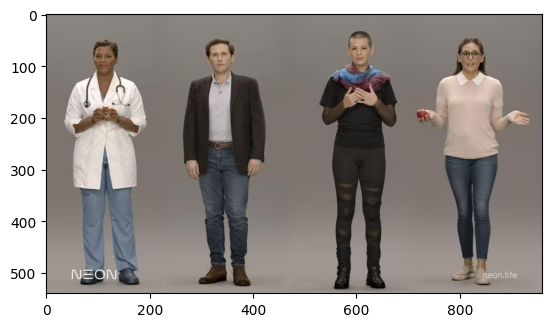

In [57]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

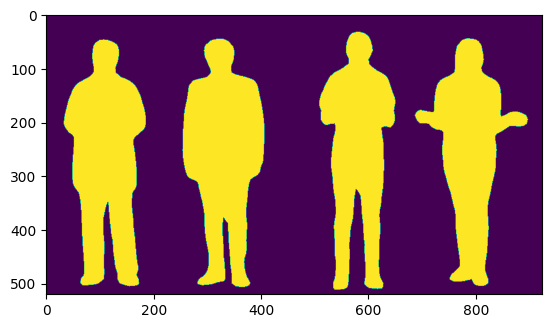

In [17]:
plt.imshow(mask)

In [19]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [21]:
mask_human = mask == class_to_idx['person']
mask_human

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [76]:
img_forest_resized = F.resize(img_forest, size=(520, 924))

img_forest_resized.size()

torch.Size([3, 520, 924])

In [77]:
mask_expanded = mask_human.unsqueeze(0).repeat(3, 1, 1)
mask_expanded.size()

torch.Size([3, 520, 924])

In [78]:
img_forest_np = np.array(img_forest_resized)
img_human_np = np.array(batch2)[:, :mask_human.shape[0], :mask_human.shape[1]]

In [79]:
final_img = img_forest_np.copy()

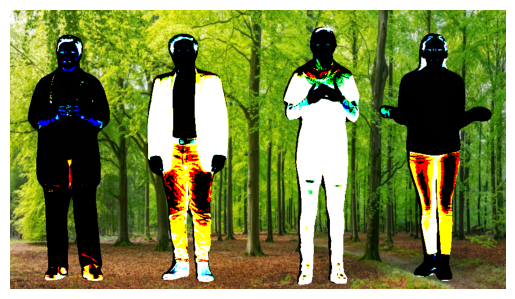

In [89]:
final_img[mask_expanded.numpy()] = img_human_np[mask_expanded.numpy()]

# 7. –í–∏–≤–µ–¥–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É
final_img_rgb = final_img.transpose(1, 2, 0)


plt.imshow(final_img_rgb)
plt.axis('off')
plt.show()

–í–∞—Ä—ñ–∞–Ω—Ç 2

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 233M/233M [00:01<00:00, 143MB/s]


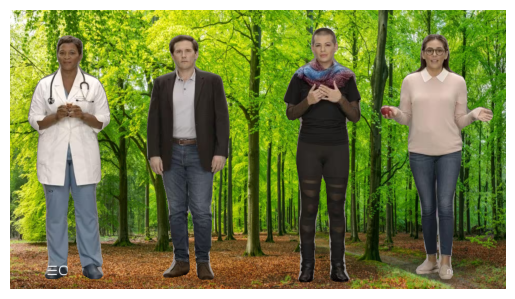

In [1]:
import torch
import requests
import numpy as np
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet101

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –∑–æ–±—Ä–∞–∂–µ–Ω—å
img_humans = Image.open(requests.get("https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/humans.jpg", stream=True).raw)
img_forest = Image.open(requests.get("https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/forest.jpg", stream=True).raw)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–æ —Ç–µ–Ω–∑–æ—Ä—ñ–≤
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_humans_tensor = transform(img_humans).unsqueeze(0)

# –°–µ–≥–º–µ–Ω—Ç–∞—Ü—ñ–π–Ω–∞ –º–æ–¥–µ–ª—å
model = deeplabv3_resnet101(pretrained=True).eval()

# –°–µ–≥–º–µ–Ω—Ç–∞—Ü—ñ—è –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è
with torch.no_grad():
    output = model(img_humans_tensor)['out'][0]
output_predictions = output.argmax(0).byte().cpu().numpy()

# –û—Ç—Ä–∏–º–∞–Ω–Ω—è –º–∞—Å–∫–∏ –¥–ª—è –ª—é–¥–µ–π
# –ö–ª–∞—Å –ª—é–¥–∏–Ω–∏ —É COCO ‚Äì 15
mask_people = (output_predictions == 15)

# –ó–º—ñ–Ω–∞ —Ä–æ–∑–º—ñ—Ä—É –ª—ñ—Å—É –¥–æ —Ä–æ–∑–º—ñ—Ä—ñ–≤ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—é–¥–µ–π
img_forest_resized = img_forest.resize(img_humans.size)
img_forest_tensor = T.ToTensor()(img_forest_resized)

# –ó–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è –º–∞—Å–∫–∏ –¥–æ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –ª—ñ—Å—É, —â–æ–± –≤—Å—Ç–∞–≤–∏—Ç–∏ –ª—é–¥–µ–π
result_img = img_forest_tensor.clone()
result_img[:, mask_people] = T.ToTensor()(img_humans)[:, mask_people]

# –í–∏–≤–µ–¥–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É
result_img = result_img.permute(1, 2, 0).numpy()  # –ü–µ—Ä–µ–º—ñ—â—É—î–º–æ –æ—Å—ñ –¥–ª—è –∫–æ—Ä–µ–∫—Ç–Ω–æ–≥–æ –≤—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è
plt.imshow(result_img)
plt.axis('off')
plt.show()


# –ó–∞–≤–¥–∞–Ω–Ω—è 2

–ü—Ä–æ–≤–µ–¥—ñ—Ç—å –¥–µ—Ç–µ–∫—Ü—ñ—é –æ–±'—î–∫—Ç—ñ–≤ –¥–ª—è –≤—ñ–¥–µ–æ

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

–ü—ñ–¥–±–µ—Ä—ñ—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è —è–∫—ñ—Å–Ω–æ–≥–æ –≤–∏—è–≤–ª–µ–Ω–Ω—è –º–∞—à–∏–Ω —Ç–∞ –∑–Ω–∞–∫—ñ–≤
–ö–æ–¥ –¥–ª—è –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –Ω–∞–±–æ—Ä—É –∑–æ–±—Ä–∞–∂–µ–Ω—å —É –≤—ñ–¥–µ–æ —î –Ω–∏–∂—á–µ

[–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü—ñ—è](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

In [12]:
import torch
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –º–æ–¥–µ–ª—ñ YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')  # –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ –º–æ–¥–µ–ª—å yolov5l –¥–ª—è –∫—Ä–∞—â–æ—ó —Ç–æ—á–Ω–æ—Å—Ç—ñ

# –ù–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –º–æ–¥–µ–ª—ñ
model.conf = 0.25  # –ü–æ—Ä—ñ–≥ –≤–ø–µ–≤–Ω–µ–Ω–æ—Å—Ç—ñ
model.iou = 0.45  # –ü–æ—Ä—ñ–≥ Intersection Over Union

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –≤—ñ–¥–µ–æ –¥–ª—è –æ–±—Ä–æ–±–∫–∏
video_path = "/content/Highway driving during the day front view camera driving plate 4k footage (1).mp4"  # –®–ª—è—Ö –¥–æ –≤–∞—à–æ–≥–æ –≤—ñ–¥–µ–æ
cap = cv2.VideoCapture(video_path)

# –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è –∫–∞–¥—Ä—ñ–≤
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# –ó–º—ñ–Ω–Ω–∞ –¥–ª—è –∑–±–µ—Ä—ñ–≥–∞–Ω–Ω—è –∫–∞–¥—Ä—ñ–≤
output_frames = []

# –û–±—Ä–æ–±–∫–∞ –∫–æ–∂–Ω–æ–≥–æ –∫–∞–¥—Ä—É –≤—ñ–¥–µ–æ
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # –í–∏–∫–æ–Ω–∞–Ω–Ω—è –¥–µ—Ç–µ–∫—Ü—ñ—ó –æ–±'—î–∫—Ç—ñ–≤ —É –∫–∞–¥—Ä—ñ
    results = model(frame)

    # –ú–∞–ª—é–≤–∞–Ω–Ω—è —Ä–∞–º–æ–∫ –¥–µ—Ç–µ–∫—Ü—ñ—ó –Ω–∞ –∫–∞–¥—Ä—ñ
    results.render()
    output_frame = results.ims[0]  # –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ ims –∑–∞–º—ñ—Å—Ç—å imgs

    # –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è –æ–±—Ä–æ–±–ª–µ–Ω–æ–≥–æ –∫–∞–¥—Ä—É —è–∫ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è
    frame_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_path, output_frame)
    output_frames.append(output_frame)  # –ó–±–µ—Ä—ñ–≥–∞—î–º–æ –∫–∞–¥—Ä —É —Å–ø–∏—Å–æ–∫

    frame_count += 1

cap.release()
print(f"–í—Å—å–æ–≥–æ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –∫–∞–¥—Ä—ñ–≤: {frame_count}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 üöÄ 2024-11-12 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWa

–í—Å—å–æ–≥–æ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –∫–∞–¥—Ä—ñ–≤: 250


# –ó–∞–≤–¥–∞–Ω–Ω—è 3

–ó–≥–µ–Ω–µ—Ä—É–π—Ç–µ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –Ω–∞ –æ—Å–Ω–æ–≤—ñ —Ç–µ–∫—Å—Ç—É

[–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü—ñ—è](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

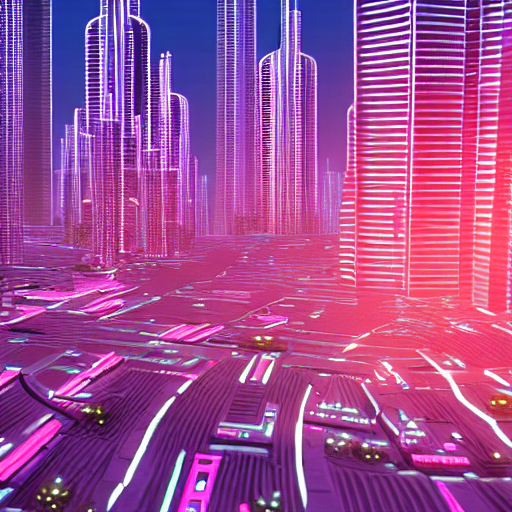

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Futuristic cityscape at dusk, glowing neon lights, flying cars, and tall skyscrapers with glass facades, soft purple and pink hues, hyper-detailed, 8k", generator=generator).images[0]
image